In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.image as mpimg
import os, shutil

# Rock Paper Scissors Dataset

The rock paper scissors dataset was made by **Laurence Moroney** and can be found on *laurencemoroney.com*. This dataset contains `2,892` images of diverse CGI hands in poses of rock, paper, or scissors. This folder has been split into three subfolders: `a training set with 2520 images`, `a validation set with 372 images` and `a test set with 33 images`. 

This dataset is also available on TensorFlow which can be seen below, however, for this report I will be using the folder which includes a validation set that is not available on the TensorFlow version. As you can see there is only a train and test split of the dataset.

Compared to the cats vs dogs dataset, the rock paper scissors dataset is considerably smaller which calls for a slightly different handling of the dataset than that seen in the book ‘Francois Chollet’s Deep Learning with Python’.

In [2]:
builder = tfds.builder('rock_paper_scissors')
builder.info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

## Downloading the data

Below we find the folder path for the rock, paper and scissors in the train, validation, and test sets. Then a sanitation check is performed to count how many pictures are in the training, validation, and test sets. 

This allows us to confirm that there are 840 images of rock, paper, and scissors each in the training set, 124 images of rock, paper, and scissors each in the validation set and 11 images of rock, paper, and scissors each in the test set.

In [2]:
#Training set
train_rock_dir = os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/rock/")
train_paper_dir = os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/paper/")
train_scissor_dir = os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/scissors/")

print("total training rock images : ",len(os.listdir(train_rock_dir)))
print("total training paper images : ", len(os.listdir(train_paper_dir)))
print("total training scissor images : ", len(os.listdir(train_scissor_dir)))


total training rock images :  840
total training paper images :  840
total training scissor images :  840


In [3]:
#Validation set
val_rock_dir = os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/rock/")
val_paper_dir = os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/paper/")
val_scissor_dir = os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/scissors/")

print("total validation rock images : ",len(os.listdir(val_rock_dir)))
print("total validation paper images : ", len(os.listdir(val_paper_dir)))
print("total validation scissor images : ", len(os.listdir(val_scissor_dir)))

total validation rock images :  124
total validation paper images :  124
total validation scissor images :  124


In [4]:
#Test set
test_rock_dir = os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/test/rock/")
test_paper_dir = os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/test/paper/")
test_scissor_dir = os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/test/scissors/")

print("total test rock images : ",len(os.listdir(test_rock_dir)))
print("total test paper images : ", len(os.listdir(test_paper_dir)))
print("total test scissor images : ", len(os.listdir(test_scissor_dir)))

total test rock images :  11
total test paper images :  11
total test scissor images :  11


In [5]:
#Training set
train_rock_files = os.listdir(train_rock_dir)
train_paper_files = os.listdir(train_paper_dir)
train_scissor_files = os.listdir(train_scissor_dir)

print("Train\n")
print(train_rock_files[:10], "\n")
print(train_paper_files[:10], "\n")
print(train_scissor_files[:10], "\n")


Train

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png'] 

['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png'] 

['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png'] 



In [6]:
#Validation set
val_rock_files = os.listdir(val_rock_dir)
val_paper_files = os.listdir(val_paper_dir)
val_scissor_files = os.listdir(val_scissor_dir)


print("Validation \n")
print(val_rock_files[:10], "\n")
print(val_paper_files[:10], "\n")
print(val_scissor_files[:10], "\n")

Validation 

['testrock01-00.png', 'testrock01-01.png', 'testrock01-02.png', 'testrock01-03.png', 'testrock01-04.png', 'testrock01-05.png', 'testrock01-06.png', 'testrock01-07.png', 'testrock01-08.png', 'testrock01-09.png'] 

['testpaper01-00.png', 'testpaper01-01.png', 'testpaper01-02.png', 'testpaper01-03.png', 'testpaper01-04.png', 'testpaper01-05.png', 'testpaper01-06.png', 'testpaper01-07.png', 'testpaper01-08.png', 'testpaper01-09.png'] 

['testscissors01-00.png', 'testscissors01-01.png', 'testscissors01-02.png', 'testscissors01-03.png', 'testscissors01-04.png', 'testscissors01-05.png', 'testscissors01-06.png', 'testscissors01-07.png', 'testscissors01-08.png', 'testscissors01-09.png'] 



In [7]:
#Test set
test_rock_files = os.listdir(test_rock_dir)
test_paper_files = os.listdir(test_paper_dir)
test_scissor_files = os.listdir(test_scissor_dir)


print("Test\n")
print(test_rock_files[:10], "\n")
print(test_paper_files[:10], "\n")
print(test_scissor_files[:10])

Test

['rock-hires1.png', 'rock-hires2.png', 'rock1.png', 'rock2.png', 'rock3.png', 'rock4.png', 'rock5.png', 'rock6.png', 'rock7.png', 'rock8.png'] 

['paper-hires1.png', 'paper-hires2.png', 'paper1.png', 'paper2.png', 'paper3.png', 'paper4.png', 'paper5.png', 'paper6.png', 'paper7.png', 'paper8.png'] 

['scissors-hires1.png', 'scissors-hires2.png', 'scissors1.png', 'scissors2.png', 'scissors3.png', 'scissors4.png', 'scissors5.png', 'scissors6.png', 'scissors7.png', 'scissors8.png']


### Images in the folder

Below are some random images from the training set, as you can see there are 2 rocks, 2 papers and 2 scissors, these are just examples of the images in the folders.

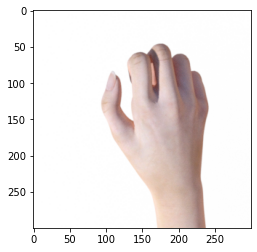

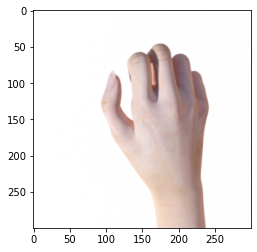

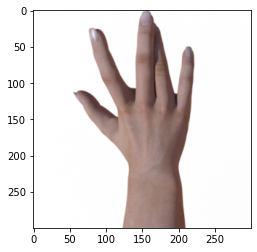

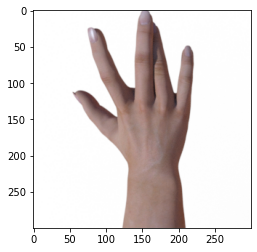

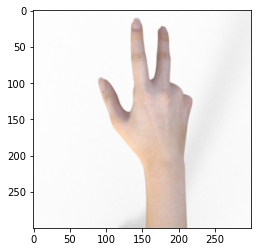

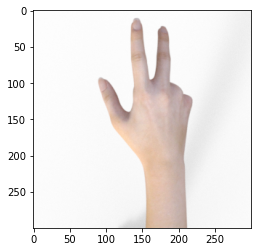

In [8]:
pic_index = 2
train_rock_img = [os.path.join(train_rock_dir, fname) for fname in train_rock_files[pic_index-2:pic_index]]
train_paper_img = [os.path.join(train_paper_dir, fname) for fname in train_paper_files[pic_index-2:pic_index]]
train_scissor_img = [os.path.join(train_scissor_dir, fname) for fname in train_scissor_files[pic_index-2:pic_index]]

for i,img_path in enumerate(train_rock_img + train_paper_img + train_scissor_img):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()



## Building the network

Seeing the split of this dataset, it can be confirmed our problem type is a **multi-class classification**. Knowing this, we can accurately figure out our loss function and last layer activation by using information from the table below. The last-layer activation will be **softmax** and the loss function appropriate for this problem is **categorical_crossentropy**.

<img src="problemtype-table.png">

#### Convolutional layer

- Convolutional layers learn local patterns, for example with images they can find patterns in small 2D windows of the inputs. 
 - They don’t need a lot of training samples to learn representation that have generalization power. 
 - They can also learn spatial hierarchies of patterns which means the convent can learn complex and abstract visual concepts.

Convolutions run over feature maps; feature maps are 3D tensors. 

These have two spatial axes which are height and width and a channel axis which is the depth. For a coloured image, the dimension of the depth axis is 3 (RGB) which is what we will be using because our images have colour. 

The output feature map is a 3D tensor made by the convolution operation, the operation gets patches from the input feature map and applies the same transformation to all these patches. The RGB colours in the output layer do not stand for colours but filters, these filters have specific aspects of the input data encoded.  

Below is the model summary of one convolutional layer with an input_shape of 150, 150, 3. There are 896 parameters (32 x (3 x 3 x 3 + 1)). 

In [53]:
modelconvlayer = models.Sequential()
modelconvlayer.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
modelconvlayer.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


#### Dense layer

The network has an input_shape of 150 x 150 and there are 11520512 total parameters (512 x (150 X 150 + 1)).

In [54]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(150 * 150, )))
network.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               11520512  
Total params: 11,520,512
Trainable params: 11,520,512
Non-trainable params: 0
_________________________________________________________________


As you can clearly see, the convolutional layer’s set of parameters is considerably less than that on the network with dense layers. 

### Baseline model

First, we are going to create a baseline model with statistical power. For this network we are going to be using convent layers. A convent takes as a 3D input tensor of shape, or known as input_shape, the image height, image width and image channel. 

To effectively down sample feature maps, **max-pooling** is often used. 

 - Max pooling extracts windows from the input feature maps and outputs the max value of each channel, instead of transforming local patches though the convolutional kernel like a convolution, max pooling changes local patches through a max tensor operation. 
 - The reason we are down-sampling this way is to encourage spatial-filter hierarchies, this is done by making consecutive convolution layers that look at increasingly large windows. 
 - This down-sampling method also reduces the number of feature map coefficients to process.

Using both Conv2D and MaxPooling2D we can augment the capacity of the network which in turn reduces the size of the feature maps so that they are not too large when we are finally ready to flatten them.

At this stage, our goal to get statistical power, this is a small model that beats the baseline. For this model we want to achieve an accuracy greater than 0.5.

- ***Last-layer activation:*** The appropriate last-layer activation to use for the multiclass classification problem is softmax.

- ***Loss function:*** The loss function used will be a categorical_crossentropy

- ***Optimization:*** For this model we’re going to be using RMSprop as an optimiser. Learning rate can be used with the optimiser to control the speed a model learns a problem. The learning rate is usually low and ranges between 0 and 1. Momentum can be used with the learning rate and the optimiser to accelerate the speed in which the model learns.


In [116]:
#Baseline model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               21234176  
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

## Data preprocessing

To pre-process the data we need to first get our images into the network, this can be done in the four steps laid out in the book ‘Francois Chollet’s Deep Learning with Python’.

1.	Read the picture files
2.	Decode the JPEG images to RGB grids of pixels
3.	Convert to floating point tensors
4.	Rescale pixel values between 0 to 255 to 0, 1 interval


We use the image data generator class in Keras that turn our image files into pre-processed batches of tensors. We first rescale all our images by 1/255. Then in the train generator we link our target directory, resize all images to 150 x 150 and initialise our class mode to use categorical labels because we are using categorical_crossentropy. We do the exact same thing for the validation generator.


In [117]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/",   # Target directory
                                                   batch_size=126, 
                                                   target_size=(150,150), # All images will be resized to 150 x 150
                                                   class_mode="categorical") # Categorical_crossentropy is the loss function so categorical labels are used

validation_generator = validation_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/",
                                                             batch_size=126,
                                                             target_size=(150,150),
                                                             class_mode="categorical")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Below are the outputs of those generators: it returns batches of 150 x 150 RGB images (shape `(126, 150, 150, 3)`) and categorical labels (shape `(126 , 3)`). The batch size which is the number of samples in each batch is 126. 

In [118]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (126, 150, 150, 3)
labels batch shape: (126, 3)


After this we fit the model using the above batch generator.

In [119]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3, 
      verbose=1)

Epoch 1/20
20/20 [==============================] - 28s 1s/step - loss: 5.5944 - accuracy: 0.5484 - val_loss: 0.8717 - val_accuracy: 0.6747
Epoch 2/20
20/20 [==============================] - 27s 1s/step - loss: 0.7498 - accuracy: 0.8619 - val_loss: 0.7445 - val_accuracy: 0.7124
Epoch 3/20
20/20 [==============================] - 27s 1s/step - loss: 0.0645 - accuracy: 0.9921 - val_loss: 0.9248 - val_accuracy: 0.7312
Epoch 4/20
20/20 [==============================] - 27s 1s/step - loss: 0.0256 - accuracy: 0.9933 - val_loss: 1.0715 - val_accuracy: 0.7097
Epoch 5/20
20/20 [==============================] - 42s 2s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.5139 - val_accuracy: 0.6962
Epoch 6/20
20/20 [==============================] - 42s 2s/step - loss: 2.6458e-04 - accuracy: 1.0000 - val_loss: 1.7117 - val_accuracy: 0.6855
Epoch 7/20
20/20 [==============================] - 41s 2s/step - loss: 8.3120e-05 - accuracy: 1.0000 - val_loss: 2.0553 - val_accuracy: 0.6855
Epoch 8/20
2

In [120]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [131]:
#Finds the highest validation accuracy
highest = np.round(max(history.history['val_accuracy'])*100,2)
#Highest accuracy at epoch 3
print("Highest validation accuracy: ", highest, "%")

Highest validation accuracy:  73.12 %


In [122]:
#Finds the lowest validation loss
#Does NOT correlate with the validation accuracy
lowest = np.round(min(history.history['val_loss']),4)
#Lowest loss at epoch 2
print("Lowest validation loss: ", lowest)

Lowest validation loss:  0.7445


In [123]:
model.save('rock_paper_scissors_1.h5')

## Plotting the models

Below is the plotting of the training and validation loss as well as the training and validation accuracy. The dotted line represents the training set and the normal line represents the validation set.

In [124]:
def plot_graphs():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

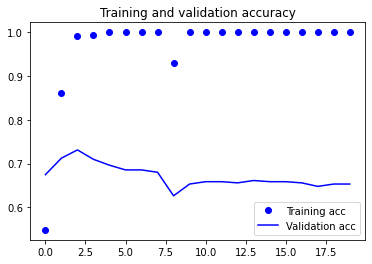

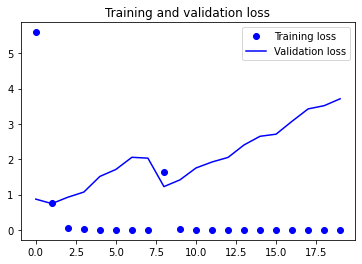

In [125]:
plot_graphs()

#### Evaluation of baseline model

We achieved our goal in creating a model with an accuracy over 0.5, however, we can see above our graphs are clearly overfitting. A model **overfits** when training loss falls whilst validation loss rises which can clearly be seen in the first graph.

Our highest accuracy with model was `73.12%` at `epoch 3`. Our dataset is quite small so overfitting was bound to happen, this seems to be the best baseline model that can be achieved at this point so we will be proceeding with this.


## Improving our current model

#### Using sparse_categorical_crossentropy 

From research gathered from Kaggle, many individuals who used this dataset to create a model used a loss function called sparse_categorical_crossentropy. This loss function is used when classes are mutually exclusive. It saves time in memory and computation because it uses a single integer for a class not a whole vector like categorical_crossentropy. Its formula seen below is almost identical to categorical_crossentropy.
<img src="crossentropyformula.png">
- W means the model parameters
- Yi is the true label
- Y^i is the predicted label

However, with sparse_categorical_crossentropy the `Yi (true label)` are integers. 

Below is a model using this loss function.


In [132]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               21234176  
_________________________________________________________________
dense_25 (Dense)             (None, 3)               

In [133]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/",   # Target directory
                                                   batch_size=126, 
                                                   target_size=(150,150), # All images will be resized to 150 x 150
                                                   class_mode="sparse") # sparse_categorical_crossentropy is the loss function so sparse labels are used

validation_generator = validation_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/",
                                                             batch_size=126,
                                                             target_size=(150,150),
                                                             class_mode="sparse")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [134]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3, 
      verbose=1)

Epoch 1/20
20/20 [==============================] - 40s 2s/step - loss: 5.1369 - accuracy: 0.6361 - val_loss: 1.7657 - val_accuracy: 0.4973
Epoch 2/20
20/20 [==============================] - 39s 2s/step - loss: 0.1607 - accuracy: 0.9690 - val_loss: 0.8252 - val_accuracy: 0.6855
Epoch 3/20
20/20 [==============================] - 39s 2s/step - loss: 0.1263 - accuracy: 0.9730 - val_loss: 2.4004 - val_accuracy: 0.3522
Epoch 4/20
20/20 [==============================] - 37s 2s/step - loss: 0.0806 - accuracy: 0.9798 - val_loss: 0.8436 - val_accuracy: 0.7258
Epoch 5/20
20/20 [==============================] - 40s 2s/step - loss: 0.7151 - accuracy: 0.9250 - val_loss: 0.7110 - val_accuracy: 0.7500
Epoch 6/20
20/20 [==============================] - 41s 2s/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.8611 - val_accuracy: 0.7527
Epoch 7/20
20/20 [==============================] - 42s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.1796 - val_accuracy: 0.7204
Epoch 8/20
20/20 [==

In [135]:
#Finds the highest validation accuracy
highest = np.round(max(history.history['val_accuracy'])*100,2)
#Highest accuracy at epoch 6
print("Highest validation accuracy: ", highest, "%")

Highest validation accuracy:  75.27 %


In [136]:
#Finds the lowest validation loss
#Does NOT correlate with the validation accuracy
lowest = np.round(min(history.history['val_loss']),4)
#Lowest loss at epoch 5
print("Lowest validation loss: ", lowest)

Lowest validation loss:  0.711


In [137]:
model.save('rock_paper_scissors_2.h5')

In [138]:
def plot_graphs2():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

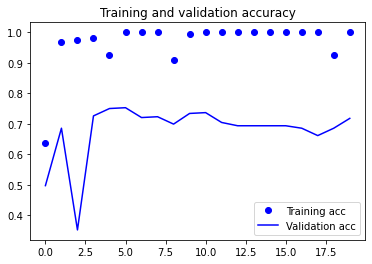

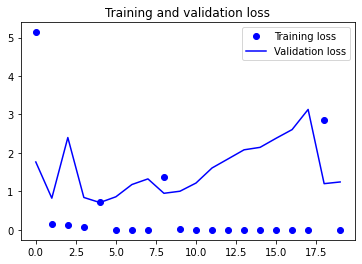

In [139]:
plot_graphs2()

### Evaluation

As we can see in the plots above our model is still overfitting however, our measure of success—which is validation accuracy—is higher with this loss function. 

This model has a validation accuracy of `75.27%` that is achieved at a later epoch than our baseline model at epoch 6. Below is a table highlighting the difference between these two loss functions. 

|Loss function |Validation Loss |Validation Accuracy(%)|Optimal validation accuracy epoch|      
|----- |----- |----- |----- |
|categorical_crossentropy|0.7445|73.12|3|
|sparse_categorical_crossentropy|0.711|75.27|6|


Since sparse_categorical_crossentropy has a better validation accuracy than categorical_crossentropy we will be moving forward with this loss function. 

***We will come back to categorical_crossentropy with our best model to compare again.***

#### Using adam optimiser

An optimiser that is often used with sparse_categorical_crossentropy is called adam. Adam is an adaptive learning rate optimiser that can be used instead of the classical stochastic gradient descent procedure to update the network weights. It is a combination between RMSprop and stochastic gradient descent with momentum. 

Similar to RMSprop it uses squared gradients to scale the learning rate and uses the moving average of the gradient instead of the gradient itself like SGD with momentum. 

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               21234176  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [21]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/",   # Target directory
                                                   batch_size=126, 
                                                   target_size=(150,150), # All images will be resized to 150 x 150
                                                   class_mode="sparse") # sparse_categorical_crossentropy is the loss function so sparse labels are used

validation_generator = validation_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/",
                                                             batch_size=126,
                                                             target_size=(150,150),
                                                             class_mode="sparse")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3, 
      verbose=1)

Epoch 1/20
20/20 [==============================] - 57s 3s/step - loss: 1.3327 - accuracy: 0.6194 - val_loss: 0.7885 - val_accuracy: 0.6694
Epoch 2/20
20/20 [==============================] - 39s 2s/step - loss: 0.1232 - accuracy: 0.9754 - val_loss: 0.5454 - val_accuracy: 0.7796
Epoch 3/20
20/20 [==============================] - 40s 2s/step - loss: 0.0153 - accuracy: 0.9976 - val_loss: 0.9261 - val_accuracy: 0.7419
Epoch 4/20
20/20 [==============================] - 40s 2s/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.8259 - val_accuracy: 0.7688
Epoch 5/20
20/20 [==============================] - 40s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.9230 - val_accuracy: 0.7661
Epoch 6/20
20/20 [==============================] - 40s 2s/step - loss: 6.2372e-04 - accuracy: 1.0000 - val_loss: 0.9047 - val_accuracy: 0.7715
Epoch 7/20
20/20 [==============================] - 40s 2s/step - loss: 4.2059e-04 - accuracy: 1.0000 - val_loss: 0.9958 - val_accuracy: 0.7634
Epoch 8/20
2

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
#Finds the highest validation accuracy
highest = np.round(max(history.history['val_accuracy'])*100,2)
#Highest accuracy at epoch 2
print("Highest validation accuracy: ", highest, "%")

Highest validation accuracy:  77.96 %


In [26]:
#Finds the lowest validation loss
#Does NOT correlate with the validation accuracy
lowest = np.round(min(history.history['val_loss']),4)
#Lowest loss at epoch 2
print("Lowest validation loss: ", lowest)

Lowest validation loss:  0.5454


In [27]:
model.save('rock_paper_scissors_3.h5')

In [28]:
def plot_graphs3():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

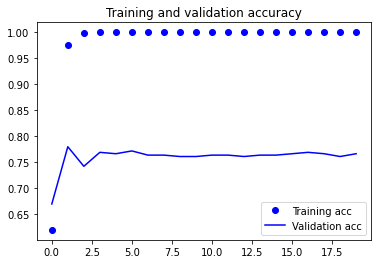

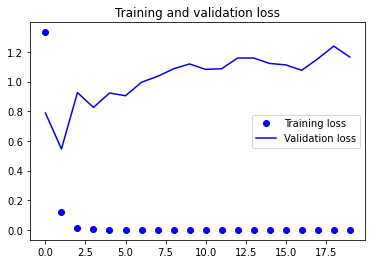

In [29]:
plot_graphs3()

#### Evaluation

As we can see our model’s validation accuracy has improved. We are now at `77.96%` validation accuracy which is our highest accuracy yet. The highest validation accuracy was reached at `epoch 2` meaning that our model overfitted earlier than when we used the RMSprop optimiser. 


We will be improving our model further by adding more layers and making the layers bigger.


### Adding more layers and making layers bigger

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

Adding another layer has considerably lessened our trainable parameters with a percentage decrease of approximately 77.61%. 

Below we are going **make our layers bigger**, add more layers and see how our model changes.

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)       

As we can see above our convolution layers with max pooling seem to be making the output shape smaller and smaller with every layer. The trainable parameters are significantly smaller than the previous model. 

Let’s see how this model performs when we run it. 

In [34]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/",   # Target directory
                                                   batch_size=126, 
                                                   target_size=(150,150), # All images will be resized to 150 x 150
                                                   class_mode="sparse") # sparse_categorical_crossentropy is the loss function so sparse labels are used

validation_generator = validation_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/",
                                                             batch_size=126,
                                                             target_size=(150,150),
                                                             class_mode="sparse")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [35]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3, 
      verbose=1)

Epoch 1/20
20/20 [==============================] - 54s 3s/step - loss: 0.7380 - accuracy: 0.6694 - val_loss: 0.7478 - val_accuracy: 0.6559
Epoch 2/20
20/20 [==============================] - 54s 3s/step - loss: 0.1187 - accuracy: 0.9611 - val_loss: 0.4390 - val_accuracy: 0.8871
Epoch 3/20
20/20 [==============================] - 53s 3s/step - loss: 0.0129 - accuracy: 0.9968 - val_loss: 0.4079 - val_accuracy: 0.9301
Epoch 4/20
20/20 [==============================] - 43s 2s/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.4898 - val_accuracy: 0.8844
Epoch 5/20
20/20 [==============================] - 42s 2s/step - loss: 3.6072e-04 - accuracy: 1.0000 - val_loss: 0.3882 - val_accuracy: 0.9194
Epoch 6/20
20/20 [==============================] - 42s 2s/step - loss: 2.1927e-04 - accuracy: 1.0000 - val_loss: 0.3908 - val_accuracy: 0.8871
Epoch 7/20
20/20 [==============================] - 42s 2s/step - loss: 1.3358e-04 - accuracy: 1.0000 - val_loss: 0.4430 - val_accuracy: 0.9005
Epoch 8/

In [36]:
#Finds the highest validation accuracy
highest = np.round(max(history.history['val_accuracy'])*100,2)
#Highest accuracy at epoch 3 
print("Highest validation accuracy: ", highest, "%")

Highest validation accuracy:  93.01 %


In [37]:
#Finds the lowest validation loss
#Does NOT correlate with the validation accuracy
lowest = np.round(min(history.history['val_loss']),4)
#Lowest loss at epoch 5
print("Lowest validation loss: ", lowest)

Lowest validation loss:  0.3882


In [38]:
model.save('rock_paper_scissors_4.h5')

In [39]:
def plot_graphs4():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

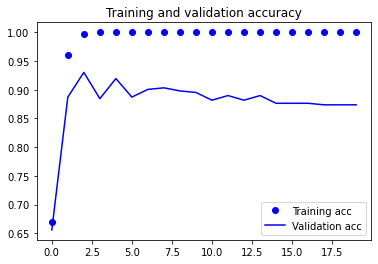

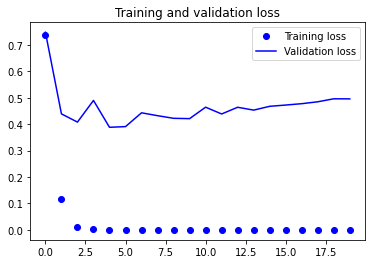

In [40]:
plot_graphs4()

By adding more layers and making our layers bigger we can see our validation accuracy improve considerably. We currently have a validation accuracy of `93.01%` which is a massive improvement from our previous model, our optimal validation accuracy epoch was at `epoch 3`. 


This model can still be improved by making our layers a little bigger. Below we are going to run a model with larger layers.


In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [43]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/",   # Target directory
                                                   batch_size=126, 
                                                   target_size=(150,150), # All images will be resized to 150 x 150
                                                   class_mode="sparse") # sparse_categorical_crossentropy is the loss function so sparse labels are used

validation_generator = validation_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/",
                                                             batch_size=126,
                                                             target_size=(150,150),
                                                             class_mode="sparse")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [44]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3, 
      verbose=1)

Epoch 1/20
20/20 [==============================] - 45s 2s/step - loss: 0.9497 - accuracy: 0.5302 - val_loss: 0.8101 - val_accuracy: 0.6640
Epoch 2/20
20/20 [==============================] - 44s 2s/step - loss: 0.2093 - accuracy: 0.9270 - val_loss: 0.4888 - val_accuracy: 0.9113
Epoch 3/20
20/20 [==============================] - 44s 2s/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 0.5786 - val_accuracy: 0.9382
Epoch 4/20
20/20 [==============================] - 45s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.6450 - val_accuracy: 0.9382
Epoch 5/20
20/20 [==============================] - 45s 2s/step - loss: 2.7134e-04 - accuracy: 1.0000 - val_loss: 0.6753 - val_accuracy: 0.9194
Epoch 6/20
20/20 [==============================] - 41s 2s/step - loss: 1.5466e-04 - accuracy: 1.0000 - val_loss: 0.7188 - val_accuracy: 0.9032
Epoch 7/20
20/20 [==============================] - 37s 2s/step - loss: 9.7999e-05 - accuracy: 1.0000 - val_loss: 0.7280 - val_accuracy: 0.9086
Epoch 8/

In [45]:
#Finds the highest validation accuracy
highest = np.round(max(history.history['val_accuracy'])*100,2)
#Highest accuracy at epoch 3-4 
print("Highest validation accuracy: ", highest, "%")

Highest validation accuracy:  93.82 %


In [46]:
#Finds the lowest validation loss
#Does NOT correlate with the validation accuracy
lowest = np.round(min(history.history['val_loss']),4)
#Lowest loss at epoch 2
print("Lowest validation loss: ", lowest)

Lowest validation loss:  0.4888


In [47]:
model.save('rock_paper_scissors_5.h5')

In [48]:
def plot_graphs5():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

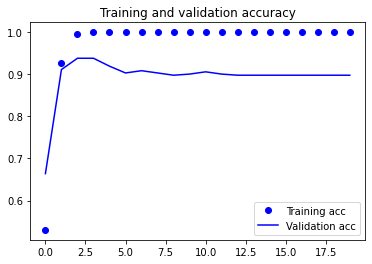

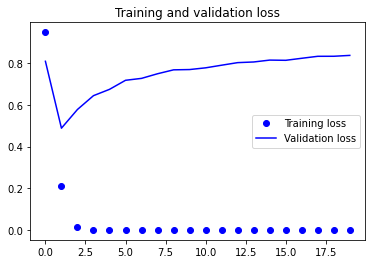

In [49]:
plot_graphs5()

This has improved our validation accuracy slightly at 93.82%. 

Below is a table summarizing the results of our previous models, as we can see this is our best model so far.

|Conv2D layers | MaxPooling2D layers|Dense layers|Flatten layers|Validation Loss |Validation Accuracy(%)|Optimal validation accuracy epoch|      
|----- |-------|----- |----- |----- |-------|-----|
|3|3|2|1|0.3882|93.01|3|
|4|4|2|1|0.4888|93.82|3-4|

Our current model is the best performing model on the validation set. Since our `measure of success is the validation accuracy`, we are looking for this highest accuracy on the validation set. 

While our mode’s accuracy is improving, we are still facing overfitting. To help combat overfitting we are going to use a regularization method called dropout.

# Data augmentation

In [28]:
# Current best model
modelaugment = models.Sequential()
modelaugment.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
modelaugment.add(layers.MaxPooling2D((2, 2)))

modelaugment.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelaugment.add(layers.MaxPooling2D((2, 2)))

modelaugment.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelaugment.add(layers.MaxPooling2D((2, 2)))

modelaugment.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelaugment.add(layers.MaxPooling2D((2, 2)))

modelaugment.add(layers.Flatten())
modelaugment.add(layers.Dense(512, activation='relu'))
modelaugment.add(layers.Dense(3, activation='softmax'))


modelaugment.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

modelaugment.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)      

A step we can take to improve our model and to tackle the glaring issue that is overfitting is by regularizing our model. Since our dataset is small there are not enough samples to learn from which is stopping our model from generalising. 

When dealing with a small dataset, our first approach should be to get more training samples, this can be done through **data augmentation**. 

  - Data augmentation generates more training data from our current training set. 
  - It augments the sample through random transformation that then produces similar images. 
  - The output is a model that will never see the same picture more than once.
  
Below is how we set up the data augmentation configuration through image data generator.


In [29]:
train_datagen = ImageDataGenerator(rotation_range=40,# randomly rotates image
                                    width_shift_range=0.2, # randomly translates images horizontally
                                    height_shift_range=0.2, # randomly translates images vertically
                                    shear_range=0.2, # randomly applies shearing transformations
                                    zoom_range=0.2,# randomly zooms inside images
                                    horizontal_flip=True, # randomly flips images horizontally
                                    fill_mode='nearest') # fills in new pixels

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/",   # Target directory
                                                   batch_size=126, 
                                                   target_size=(150,150), # All images will be resized to 150 x 150
                                                   class_mode="sparse") # sparse_categorical_crossentropy is the loss function so sparse labels are used

validation_generator = validation_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/",
                                                             batch_size=126,
                                                             target_size=(150,150),
                                                             class_mode="sparse")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


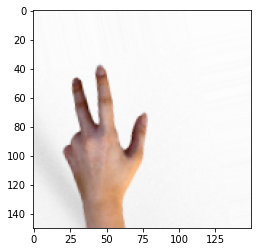

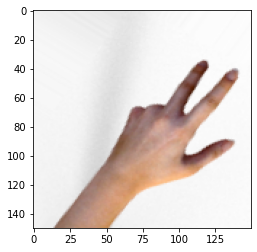

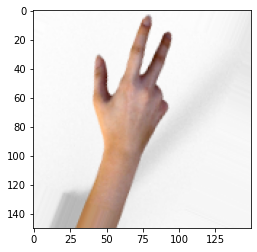

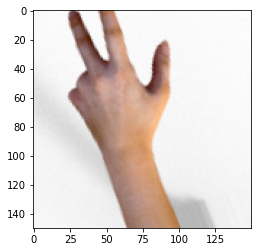

In [30]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_scissor_dir, fname) for
fname in os.listdir(train_scissor_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)
i=0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()


As you can see above an image has been taken from the training set of hands forming scissors and this image has been augmented using the parameters we had previously set out.

With this regularization technique implemented, let’s see how our model performed.

In [31]:
history = modelaugment.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3, 
      verbose=1)

Epoch 1/20
20/20 [==============================] - 41s 2s/step - loss: 21.4671 - accuracy: 0.3829 - val_loss: 1.0986 - val_accuracy: 0.3844
Epoch 2/20
20/20 [==============================] - 39s 2s/step - loss: 0.9706 - accuracy: 0.5131 - val_loss: 1.0980 - val_accuracy: 0.3548
Epoch 3/20
20/20 [==============================] - 41s 2s/step - loss: 0.7466 - accuracy: 0.6718 - val_loss: 1.0941 - val_accuracy: 0.3575
Epoch 4/20
20/20 [==============================] - 42s 2s/step - loss: 0.5700 - accuracy: 0.7599 - val_loss: 1.0922 - val_accuracy: 0.3414
Epoch 5/20
20/20 [==============================] - 44s 2s/step - loss: 0.4333 - accuracy: 0.8365 - val_loss: 1.0920 - val_accuracy: 0.3333
Epoch 6/20
20/20 [==============================] - 43s 2s/step - loss: 0.3377 - accuracy: 0.8702 - val_loss: 1.0883 - val_accuracy: 0.3333
Epoch 7/20
20/20 [==============================] - 43s 2s/step - loss: 0.2754 - accuracy: 0.9063 - val_loss: 1.0845 - val_accuracy: 0.4247
Epoch 8/20
20/20 [=

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
#Finds the highest validation accuracy
highest = np.round(max(history.history['val_accuracy'])*100,2)
#Highest accuracy at epoch 14
print("Highest validation accuracy: ", highest, "%")

Highest validation accuracy:  46.77 %


In [39]:
#Finds the lowest validation loss
#Does NOT correlate with the validation accuracy
lowest = np.round(min(history.history['val_loss']),4)
#Lowest loss at epoch 16
print("Lowest validation loss: ", lowest)

Lowest validation loss:  1.077


In [40]:
modelaugment.save('rock_paper_scissors_6.h5')

In [41]:
def plot_graphsdataug():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

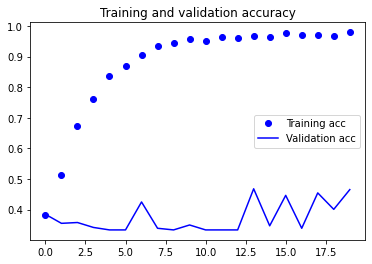

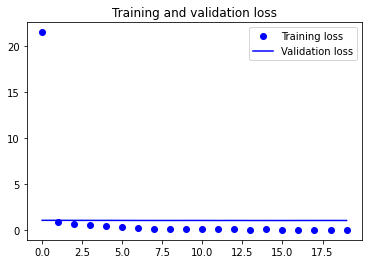

In [42]:
plot_graphsdataug()

As we can see above our model performed terribly with the lowest validation accuracy at 46.77%. The validation accuracy’s optimal epoch was a lot later than usual at epoch 14. 

Let’s try another regularization method with data augmentation, **dropout**.

#### Using dropout

Dropout is one of the most effective and commonly used regularization techniques for neural networks. When dropout is applied to a layer it randomly drops out some output features during training (dropping out sets the dropped-out outputs to zero). For example, the returned vector ```[0.2,0.5,1.3,0.8,1.1]``` after dropout, the layer’s output values are scaled down by a factor equal to the dropping rate, the vector will have zero entries allocated randomly which would produce a vector that looks like this: ```[0,0.5,1.3,0,1.1]```. The dropout rate is usually set between 0.2 and 0.5.

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)      

In [44]:
train_datagen = ImageDataGenerator(rotation_range=40,# randomly rotates image
                                    width_shift_range=0.2, # randomly translates images horizontally
                                    height_shift_range=0.2, # randomly translates images vertically
                                    shear_range=0.2, # randomly applies shearing transformations
                                    zoom_range=0.2,# randomly zooms inside images
                                    horizontal_flip=True, # randomly flips images horizontally
                                    fill_mode='nearest') # fills in new pixels

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/",   # Target directory
                                                   batch_size=126, 
                                                   target_size=(150,150), # All images will be resized to 150 x 150
                                                   class_mode="sparse") # sparse_categorical_crossentropy is the loss function so sparse labels are used

validation_generator = validation_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/",
                                                             batch_size=126,
                                                             target_size=(150,150),
                                                             class_mode="sparse")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [45]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3, 
      verbose=1)

Epoch 1/20
20/20 [==============================] - 43s 2s/step - loss: 29.1187 - accuracy: 0.3528 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 2/20
20/20 [==============================] - 45s 2s/step - loss: 0.9975 - accuracy: 0.4869 - val_loss: 1.0974 - val_accuracy: 0.3763
Epoch 3/20
20/20 [==============================] - 46s 2s/step - loss: 0.9793 - accuracy: 0.5016 - val_loss: 1.0973 - val_accuracy: 0.5188
Epoch 4/20
20/20 [==============================] - 49s 2s/step - loss: 0.7701 - accuracy: 0.6472 - val_loss: 1.0922 - val_accuracy: 0.5484
Epoch 5/20
20/20 [==============================] - 51s 3s/step - loss: 0.6827 - accuracy: 0.6873 - val_loss: 1.0927 - val_accuracy: 0.3441
Epoch 6/20
20/20 [==============================] - 48s 2s/step - loss: 0.5792 - accuracy: 0.7627 - val_loss: 1.0907 - val_accuracy: 0.3575
Epoch 7/20
20/20 [==============================] - 46s 2s/step - loss: 0.4839 - accuracy: 0.8151 - val_loss: 1.0871 - val_accuracy: 0.4704
Epoch 8/20
20/20 [=

In [46]:
#Finds the highest validation accuracy
highest = np.round(max(history.history['val_accuracy'])*100,2)
#Highest accuracy at epoch 16
print("Highest validation accuracy: ", highest, "%")

Highest validation accuracy:  79.3 %


In [47]:
#Finds the lowest validation loss
#Does NOT correlate with the validation accuracy
lowest = np.round(min(history.history['val_loss']),4)
#Lowest loss at epoch 17
print("Lowest validation loss: ", lowest)

Lowest validation loss:  1.0768


In [48]:
model.save('rock_paper_scissors_7.h5')

In [49]:
def plot_graphsdropout():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

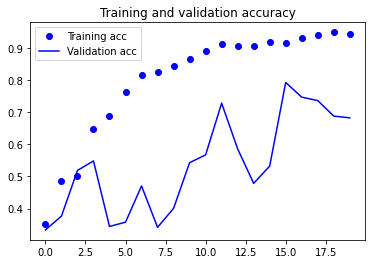

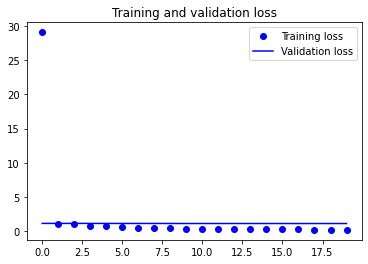

In [50]:
plot_graphsdropout()

#### Evaluation

This model performed considerably better than the last model with an accuracy of `79.3% at epoch 16`. The model was a lot more resistant to overfitting and produced a decent accuracy. 

While previous models had better accuracy, it should be noted that those models were heavily overfitting. We want a model that 
   - has a good validation accuracy
   - is resistant to overfitting 
   - performs better than our baseline 

This model ticks all those boxes however this model can be better.


Previously, I stated that we would return to categorical_crossentropy and rmsprop and compare if it does better than sparse_categorical_crossentropy and adam.


Below we will test the same model with the only difference being the loss function and the optimiser.


In [15]:
modelb = models.Sequential()
modelb.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
modelb.add(layers.MaxPooling2D((2, 2)))

modelb.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelb.add(layers.MaxPooling2D((2, 2)))

modelb.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelb.add(layers.MaxPooling2D((2, 2)))

modelb.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelb.add(layers.MaxPooling2D((2, 2)))

modelb.add(layers.Flatten())
modelb.add(layers.Dropout(0.5))
modelb.add(layers.Dense(512, activation='relu'))
modelb.add(layers.Dense(3, activation='softmax'))


modelb.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

modelb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,# randomly rotates image
                                    width_shift_range=0.2, # randomly translates images horizontally
                                    height_shift_range=0.2, # randomly translates images vertically
                                    shear_range=0.2, # randomly applies shearing transformations
                                    zoom_range=0.2,# randomly zooms inside images
                                    horizontal_flip=True, # randomly flips images horizontally
                                    fill_mode='nearest') # fills in new pixels

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/train/",   # Target directory
                                                   batch_size=126, 
                                                   target_size=(150,150), # All images will be resized to 150 x 150
                                                   class_mode="categorical") # categorical_crossentropy is the loss function so categorical labels are used

validation_generator = validation_datagen.flow_from_directory("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/validation/",
                                                             batch_size=126,
                                                             target_size=(150,150),
                                                             class_mode="categorical")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [18]:
history = modelb.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=3, 
      verbose=1)

Epoch 1/20
20/20 [==============================] - 41s 2s/step - loss: 1.1996 - accuracy: 0.3639 - val_loss: 1.1021 - val_accuracy: 0.3333
Epoch 2/20
20/20 [==============================] - 40s 2s/step - loss: 1.1306 - accuracy: 0.4111 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 3/20
20/20 [==============================] - 40s 2s/step - loss: 0.9991 - accuracy: 0.5218 - val_loss: 0.5418 - val_accuracy: 0.9140
Epoch 4/20
20/20 [==============================] - 42s 2s/step - loss: 1.1342 - accuracy: 0.6234 - val_loss: 0.4395 - val_accuracy: 0.8952
Epoch 5/20
20/20 [==============================] - 43s 2s/step - loss: 0.6542 - accuracy: 0.7139 - val_loss: 0.4934 - val_accuracy: 0.6989
Epoch 6/20
20/20 [==============================] - 44s 2s/step - loss: 0.6155 - accuracy: 0.7254 - val_loss: 0.2264 - val_accuracy: 0.9704
Epoch 7/20
20/20 [==============================] - 47s 2s/step - loss: 0.4922 - accuracy: 0.7921 - val_loss: 0.1524 - val_accuracy: 0.9973
Epoch 8/20
20/20 [==

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
#Finds the highest validation accuracy
highest = np.round(max(history.history['val_accuracy'])*100,2)
#Highest accuracy at epoch 5 
print("Highest validation accuracy: ", highest, "%")

Highest validation accuracy:  99.73 %


In [21]:
#Finds the lowest validation loss
#Does NOT correlate with the validation accuracy
lowest = np.round(min(history.history['val_loss']),4)
#Lowest loss at epoch 13
print("Lowest validation loss: ", lowest)

Lowest validation loss:  0.0217


In [23]:
modelb.save('rock_paper_scissors_8.h5')

In [24]:
def plot_graphslast():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

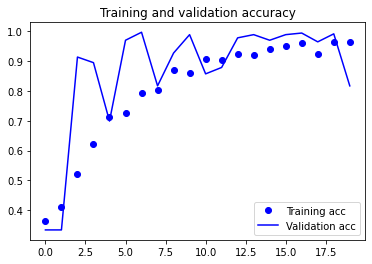

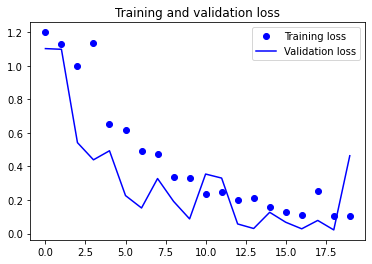

In [25]:
plot_graphslast()

#### Evaluation

This model performed extremely well. It has the best accuracy we have seen so far at `99.73%` and it is much more resistant to overfitting. The highest accuracy was reached at `epoch 7`. 

Below is a table showing the difference between the baseline model, the best model with sparse_categorical_crossentropy and adam and the best model with categorical_crossentropy and rmsprop.

|Loss function |Optimiser|Validation Loss |Validation Accuracy(%)|Optimal validation accuracy epoch|      
|----- |------|----- |----- |----- |
|categorical_crossentropy(Basline model)|RMSprop|0.7445|73.12|3|
|sparse_categorical_crossentropy(Best model)|adam|1.0768|79.30|16|
|categorical_crossentropy(Best model)|RMSprop|0.0217|99.73|7|


The table above shows that the last model not only has the best validation accuracy but also the lowest validation loss. Since we have the best model that conforms to our measure of success, which is validation accuracy, we can move forward and test our model.

# Test

In [118]:
#Code from https://www.kaggle.com/kamalkhumar/multiclass-classification-with-image-augmentation
import pandas as pd
test_img = os.listdir(os.path.join("/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/test/"))

test_df = pd.DataFrame({'Image': test_img})
test_df.head()

,Image
0,paper-hires1.png
1,paper-hires2.png
2,paper1.png
3,paper2.png
4,paper3.png


In [119]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/test/", 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 33 validated image filenames.


In [124]:
predict = modelb.predict(test_generator, steps = int(np.ceil(33/20)))

In [125]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [126]:
test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(label_map)

In [127]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)

In [135]:
print("Accuracy of our best model on test data is {:.2f}".format((sum(lis)/len(lis))*100), "%")

Accuracy of our best model on test data is 87.88 %


# Visualizing our model with OpenCV 

Below we are going to see if our model can accurately predict the images provided as either rock, paper or scissors. 

Rock


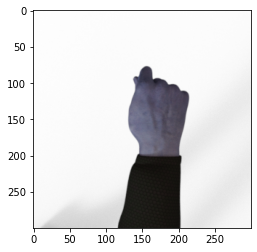

In [133]:
import cv2
from tensorflow.keras.preprocessing import image

path = "/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/test/rock2.png"
cv_img = cv2.imread(path)

img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = modelb.predict(images, batch_size=10)

for i in classes:
    if i[0] == 1:
        print("paper")
    elif i[1] == 1:
        print("Rock")
    elif i[2] == 1:
        print("Scissor")
    else:
        print("Unknown image")

        
plt.imshow(cv_img)


Rock


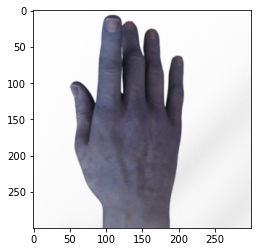

In [136]:
path = "/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/test/paper1.png"
cv_img = cv2.imread(path)

img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = modelb.predict(images, batch_size=10)

for i in classes:
    if i[0] == 1:
        print("paper")
    elif i[1] == 1:
        print("Rock")
    elif i[2] == 1:
        print("Scissor")
    else:
        print("Unknown image")

        
plt.imshow(cv_img)

Scissor


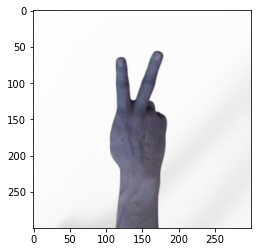

In [137]:
path = "/Users/haala/Rock-Paper-Scissors/Rock-Paper-Scissors/test/scissors1.png"
cv_img = cv2.imread(path)

img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = modelb.predict(images, batch_size=10)

for i in classes:
    if i[0] == 1:
        print("paper")
    elif i[1] == 1:
        print("Rock")
    elif i[2] == 1:
        print("Scissor")
    else:
        print("Unknown image")

        
plt.imshow(cv_img)

# Final evaluation

The accuracy on our test data was **`87.88%`** which is not bad at all. There was approximately a 12% decrease from the validation set. 

We can see this model performing above by accurately predicting whether the images provided are rock, paper or scissors. This model accurately predicted the image `2 out of the 3 tests`, failing only to predict paper.


 A way to improve this model would definitely be by using pretrained models. Pretrained models are extremely effective on small datasets like this one because the pretrained model has been trained on a large dataset. 
 
 What does this mean? 
 - Well, because the model has been trained on a large dataset, the spatial hierarchy of features learned by the pretrained model can act as a generic model of the visual world.  
 
A pretrained model would fix the problem of not having enough data which would thus help our model generalise better.


# References 

1. Raj, A., 2020. Rock Paper Scissor Classification Using CNN 98% Ac. [online] Kaggle.com. Available at: <https://www.kaggle.com/aadarshraj4444/rock-paper-scissor-classification-using-cnn-98-ac> [Accessed 5 January 2021].
2. other, C. and Moncada-Torres, A., n.d. Cross Entropy Vs. Sparse Cross Entropy: When To Use One Over The Other. [online] Cross Validated. Available at: <https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other> [Accessed 5 January 2021].
3. Peltarion.com. n.d. Categorical Crossentropy Loss Function | Peltarion Platform. [online] Available at: <https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy> [Accessed 5 January 2021].
4. Brownlee, J., n.d. Gentle Introduction To The Adam Optimization Algorithm For Deep Learning. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam,derived%20from%20adaptive%20moment%20estimation.> [Accessed 5 January 2021].
5. Medium. n.d. Adam — Latest Trends In Deep Learning Optimization.. [online] Available at: <https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c> [Accessed 5 January 2021].